In [8]:
import osmnx as ox

This guide covers usage of all public modules and functions. Every function can be accessed via ox.module_name.function_name() and the vast majority of them can also be accessed directly via ox.function_name() as a shortcut. Only a few less-common functions are accessible only via ox.module_name.function_name().

# osmnx.bearing
Calculate graph edge bearings.

## osmnx.bearing.add_edge_bearings
`osmnx.bearing.add_edge_bearings(G, precision=1)`

Add compass bearing attributes to all graph edges.

Vectorized function to calculate (initial) bearing（方位） from origin node to destination node for each edge in a directed, unprojected(未规划) graph then add these bearings as new edge attributes. Bearing represents angle in degrees (clockwise) between north and the geodesic line from from the origin node to the destination node. Ignores self-loop edges as their bearings are undefined.

向量函数计算(初始)从原点节点到目标节点的每个边在一个有向的，未投影的图，然后添加这些轴承作为新的边属性。方位表示从原点节点到目标节点的北线和测地线之间的角度(顺时针)。忽略自环边缘，因为它们的轴承未定义。

Parameters:	
G (networkx.MultiDiGraph) – unprojected graph
precision (int) – decimal precision to round bearing
Returns:	
G – graph with edge bearing attributes

Return type:	
networkx.MultiDiGraph

## osmnx.bearing.calculate_bearing
`osmnx.bearing.calculate_bearing(lat1, lng1, lat2, lng2)`

Calculate the compass bearing(s) between pairs of lat-lng points.

Vectorized function to calculate (initial) bearings between two points’ coordinates or between arrays of points’ coordinates. Expects coordinates in decimal degrees. Bearing represents angle in degrees (clockwise) between north and the geodesic line from point 1 to point 2.

计算两点坐标之间或点坐标数组之间(初始)方位的向量化函数。期望以十进制度表示坐标。方位表示从点1到点2之间的北线和测地线之间的角度(顺时针)。

Parameters:	
lat1 (float or numpy.array of float) – first point’s latitude coordinate
lng1 (float or numpy.array of float) – first point’s longitude coordinate
lat2 (float or numpy.array of float) – second point’s latitude coordinate
lng2 (float or numpy.array of float) – second point’s longitude coordinate
Returns:	
bearing – the bearing(s) in decimal degrees

Return type:	
float or numpy.array of float

## osmnx.bearing.get_bearing(origin_point, destination_point)
Do not use, deprecated.

Parameters:	
origin_point (tuple) – deprecated, do not use
destination_point (tuple) – deprecated, do not use
Returns:	
bearing – deprecated, do not use

Return type:	
float

## osmnx.bearing.orientation_entropy
`osmnx.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None)`

Calculate undirected graph’s orientation entropy.

Orientation entropy is the entropy of its edges’ bidirectional bearings across evenly spaced bins. Ignores self-loop edges as their bearings are undefined.

Parameters:	
Gu (networkx.MultiGraph) – undirected, unprojected graph with bearing attributes on each edge
num_bins (int) – number of bins; for example, if num_bins=36 is provided, then each bin will represent 10° around the compass
min_length (float) – ignore edges with length attributes less than min_length; useful to ignore the noise of many very short edges
weight (string) – if not None, weight edges’ bearings by this (non-null) edge attribute. for example, if “length” is provided, this will return 1 bearing observation per meter per street, which could result in a very large bearings array.
Returns:	
entropy – the graph’s orientation entropy

Return type:	
float

## osmnx.bearing.plot_orientation
```python
osmnx.bearing.plot_orientation(
    Gu,
    num_bins=36,
    min_length=0,
    weight=None,
    ax=None,
    figsize=(5, 5),
    area=True,
    color='#003366',
    edgecolor='k',
    linewidth=0.5,
    alpha=0.7,
    title=None,
    title_y=1.05,
    title_font=None,
    xtick_font=None
)
```

绘制空间网络双向边缘轴承的极直方图。忽略自环，因为它们未定义方位；
Plot a polar histogram of a spatial network’s bidirectional edge bearings.

Ignores self-loop edges as their bearings are undefined.

更多信息参见[链接](https://doi.org/10.1007/s41109-019-0189-1)

Parameters:	
- Gu (networkx.MultiGraph) – undirected, unprojected graph with bearing attributes on each edge
- num_bins (int) – number of bins; for example, if num_bins=36 is provided, then each bin will represent 10° around the compass
- min_length (float) – ignore edges with length attributes less than min_length
- weight (string) – if not None, weight edges’ bearings by this (non-null) edge attribute
ax (matplotlib.axes.PolarAxesSubplot) – if not None, plot on this preexisting axis; must have projection=polar
figsize (tuple) – if ax is None, create new figure with size (width, height)
area (bool) – if True, set bar length so area is proportional to frequency, otherwise set bar length so height is proportional to frequency
color (string) – color of histogram bars
edgecolor (string) – color of histogram bar edges
linewidth (float) – width of histogram bar edges
alpha (float) – opacity of histogram bars
title (string) – title for plot
title_y (float) – y position to place title
title_font (dict) – the title’s fontdict to pass to matplotlib
xtick_font (dict) – the xtick labels’ fontdict to pass to matplotlib
Returns:	
fig, ax – matplotlib figure, axis

Return type:	
tuple

# osmnx.distance module
主要进行距离和最短路径的计算，找到最近的节点、边、点


## osmnx.distance.add_edge_lengths(G, precision=3)
Add length attribute (in meters) to each edge.

计算每个边的关联节点之间的大圆距离的向量化函数。确保图是在未投影坐标，并未简化以获得准确的距离。注意:此函数会自动被所有`graph.graph_from_x`函数调用以对所有的边添加长度属性；

Vectorized function to calculate great-circle distance between each edge’s incident nodes. Ensure graph is in unprojected coordinates, and unsimplified to get accurate distances. Note: this function is run by all the graph.graph_from_x functions automatically to add length attributes to all edges.

Parameters:	
G (networkx.MultiDiGraph) – unprojected, unsimplified input graph
precision (int) – decimal precision to round lengths
Returns:	
G – graph with edge length attributes

Return type:	
networkx.MultiDiGraph

## osmnx.distance.euclidean_dist_vec(y1, x1, y2, x2)
计算点对之间的欧氏距离。

向量化函数来计算两点坐标之间或点坐标数组之间的欧氏距离。为了得到准确的结果，使用投影坐标而不是十进制度。
Calculate Euclidean distances between pairs of points.

Vectorized function to calculate the Euclidean distance between two points’ coordinates or between arrays of points’ coordinates. For accurate results, use projected coordinates rather than decimal degrees.

Parameters:	
y1 (float or numpy.array of float) – first point’s y coordinate
x1 (float or numpy.array of float) – first point’s x coordinate
y2 (float or numpy.array of float) – second point’s y coordinate
x2 (float or numpy.array of float) – second point’s x coordinate
Returns:	
dist – distance from each (x1, y1) to each (x2, y2) in coordinates’ units

Return type:	
float or numpy.array of float

## osmnx.distance.get_nearest_edge(G, point, return_geom=False, return_dist=False)
Do not use, deprecated.

Parameters:	
G (networkx.MultiDiGraph) – deprecated, do not use
point (tuple) – deprecated, do not use
return_geom (bool) – deprecated, do not use
return_dist (bool) – deprecated, do not use
Returns:	
Return type:	
tuple

## osmnx.distance.get_nearest_edges(G, X, Y, method=None, dist=None)
Do not use, deprecated.

Parameters:	
G (networkx.MultiDiGraph) – deprecated, do not use
X (list-like) – deprecated, do not use
Y (list-like) – deprecated, do not use
method (string) – deprecated, do not use
dist (float) – deprecated, do not use
Returns:	
Return type:	
numpy.array

## osmnx.distance.get_nearest_node(G, point, method=None, return_dist=False)
Do not use, deprecated.

Parameters:	
G (networkx.MultiDiGraph) – deprecated, do not use
point (tuple) – deprecated, do not use
method (string) – deprecated, do not use
return_dist (bool) – deprecated, do not use
Returns:	
Return type:	
int or tuple

## osmnx.distance.get_nearest_nodes(G, X, Y, method=None, return_dist=False)
Do not use, deprecated.

Parameters:	
G (networkx.MultiDiGraph) – deprecated, do not use
X (list) – deprecated, do not use
Y (list) – deprecated, do not use
method (string) – deprecated, do not use
return_dist (bool) – deprecated, do not use
Returns:	
Return type:	
numpy.array or tuple of numpy.array

## osmnx.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009)
计算点对之间的大圆距离。

用haversine公式计算两点坐标或点坐标数组之间的大圆距离的向量化函数。期望以十进制度表示坐标。

Calculate great-circle distances between pairs of points.

Vectorized function to calculate the great-circle distance between two points’ coordinates or between arrays of points’ coordinates using the haversine formula. Expects coordinates in decimal degrees.

Parameters:	
lat1 (float or numpy.array of float) – first point’s latitude coordinate
lng1 (float or numpy.array of float) – first point’s longitude coordinate
lat2 (float or numpy.array of float) – second point’s latitude coordinate
lng2 (float or numpy.array of float) – second point’s longitude coordinate
earth_radius (float) – radius of earth in units in which distance will be returned (default is meters)
Returns:	
dist – distance from each (lat1, lng1) to each (lat2, lng2) in units of earth_radius

Return type:	
float or numpy.array of float

## osmnx.distance.k_shortest_paths(G, orig, dest, k, weight='length')
得到k条从起始节点到目的节点的最短路径。

Get k shortest paths from origin node to destination node.

See also shortest_path to get just the one shortest path.

Parameters:	
G (networkx.MultiDiGraph) – input graph
orig (int) – origin node ID
dest (int) – destination node ID
k (int) – number of shortest paths to get
weight (string) – edge attribute to minimize when solving shortest paths. default is edge length in meters.
Returns:	
paths – a generator of k shortest paths ordered by total weight. each path is a list of node IDs.

Return type:	
generator

## osmnx.distance.nearest_edges(G, X, Y, interpolate=None, return_dist=False)
求离某点最近的边。

如果interpolate为None，使用r-tree搜索到每个点的最近边，每次一个，并最小化从点到可能匹配点的欧氏距离。为了精确，使用投影的图形和点。如果搜索的点与图的大小相关，这种方法是精确和快速的。

如果搜索相对于图的大小的许多点，一个更快的方法，使用插值参数沿边插值点并索引它们。如果图被投影，这将使用k-d树进行欧几里得最近邻搜索，这需要安装scpy作为一个可选的依赖项。如果graph未被投影，这将使用一个球树来进行haversine最近邻搜索，这需要将scikit-learn作为一个可选的依赖项安装。

Find the nearest edge(s) to some point(s).

If interpolate is None, search for the nearest edge to each point, one at a time, using an r-tree and minimizing the euclidean distances from the point to the possible matches. For accuracy, use a projected graph and points. This method is precise and also fastest if searching for few points relative to the graph’s size.

For a faster method if searching for many points relative to the graph’s size, use the interpolate argument to interpolate points along the edges and index them. If the graph is projected, this uses a k-d tree for euclidean nearest neighbor search, which requires that scipy is installed as an optional dependency. If graph is unprojected, this uses a ball tree for haversine nearest neighbor search, which requires that scikit-learn is installed as an optional dependency.

Parameters:	
G (networkx.MultiDiGraph) – graph in which to find nearest edges
X (float or numpy.array) – points’ x or longitude coordinates, in same CRS/units as graph and containing no nulls
Y (float or numpy.array) – points’ y or latitude coordinates, in same CRS/units as graph and containing no nulls
interpolate (float) – spacing distance between interpolated points, in same units as graph. smaller values generate more points.
return_dist (bool) – optionally also return distance between points and nearest edges
Returns:	
nearest edges as (u, v, key) or optionally a tuple where dist contains distances between the points and their nearest edges

Return type:	
ne or (ne, dist)

## osmnx.distance.nearest_nodes(G, X, Y, return_dist=False)
求离某坐标点最近的节点；

如果图被投影，这将使用k-d树进行欧几里得最近邻搜索，这需要安装scpy作为一个可选的依赖项。如果它是未被投影的，这将使用一个球树来进行haversine最近邻搜索，这需要将scikit-learn作为一个可选的依赖项安装。

Find the nearest node(s) to some point(s).

If the graph is projected, this uses a k-d tree for euclidean nearest neighbor search, which requires that scipy is installed as an optional dependency. If it is unprojected, this uses a ball tree for haversine nearest neighbor search, which requires that scikit-learn is installed as an optional dependency.

**Parameters**:
- G (networkx.MultiDiGraph) – graph in which to find nearest nodes
- X：浮点型或 numpy 数组；点的 x 坐标或经度坐标 – points’ x or longitude coordinates, in same CRS/units as graph and containing no nulls
- Y (float or numpy.array) – points’ y or latitude coordinates, in same CRS/units as graph and containing no nulls
return_dist (bool) – optionally also return distance between points and nearest nodes
Returns:	
nearest node IDs or optionally a tuple where dist contains distances between the points and their nearest nodes

Return type:	
nn or (nn, dist)

## osmnx.distance.shortest_path(G, orig, dest, weight='length')
得到从起始节点到目的节点的最短路径。

请参见k_shortest_paths获取多个最短路径。

这个函数是对networkx.shortest_path的一个方便的包装。对于更多的功能或不同的算法，直接使用networkx。

Parameters:	
G (networkx.MultiDiGraph) – input graph
orig (int) – origin node ID
dest (int) – destination node ID
weight (string) – edge attribute to minimize when solving shortest path. default is edge length in meters.
Returns:	
path – list of node IDs consituting the shortest path

Return type:	
list

# osmnx.downloader module
Interact with the OSM APIs.

## osmnx.downloader.nominatim_request(params, request_type='search', pause=1, error_pause=60)
Send a HTTP GET request to the Nominatim API and return JSON response.

Parameters:	
params (OrderedDict) – key-value pairs of parameters
request_type (string {"search", "reverse", "lookup"}) – which Nominatim API endpoint to query
pause (int) – how long to pause before request, in seconds. per the nominatim usage policy: “an absolute maximum of 1 request per second” is allowed
error_pause (int) – how long to pause in seconds before re-trying request if error
Returns:	
response_json

Return type:	
dict

## osmnx.downloader.overpass_request(data, pause=None, error_pause=60)
Send a HTTP POST request to the Overpass API and return JSON response.

Parameters:	
data (OrderedDict) – key-value pairs of parameters
pause (int) – how long to pause in seconds before request, if None, will query API status endpoint to find when next slot is available
error_pause (int) – how long to pause in seconds (in addition to pause) before re-trying request if error
Returns:	
response_json

Return type:	
dict

# osmnx.elevation module
获取节点标高并计算边缘等级
Get node elevations and calculate edge grades.

## osmnx.elevation.add_edge_grades(G, add_absolute=True, precision=3)
为每个图边添加等级属性。

向量化函数来计算图中每条边的有向等级(即上升超过运行)，并将其作为属性添加到边上。节点必须已经具有提升属性才能使用此函数。

Add grade attribute to each graph edge.

Vectorized function to calculate the directed grade (ie, rise over run) for each edge in the graph and add it to the edge as an attribute. Nodes must already have elevation attributes to use this function.

See also the add_node_elevations function.

Parameters:	
G (networkx.MultiDiGraph) – input graph with elevation node attribute
add_absolute (bool) – if True, also add absolute value of grade as grade_abs attribute
precision (int) – decimal precision to round grade values
Returns:	
G – graph with edge grade (and optionally grade_abs) attributes

Return type:	
networkx.MultiDiGraph

## osmnx.elevation.add_node_elevations(G, api_key, max_locations_per_batch=350, pause_duration=0, precision=3)
Do not use, deprecated, will be removed in a future release.

This function and the elevation_provider setting are deprecated.

Parameters:	
G (networkx.MultiDiGraph) – deprecated, do not use
api_key (string) – deprecated, do not use
max_locations_per_batch (int) – deprecated, do not use
pause_duration (float) – deprecated, do not use
precision (int) – deprecated, do not use
Returns:	
G

Return type:	
networkx.MultiDiGraph

## osmnx.elevation.add_node_elevations_google(G, api_key, max_locations_per_batch=350, pause_duration=0, precision=3)
使用web服务向每个节点添加海拔(米)属性。
这使用谷歌映射海拔API，并需要一个API密钥。有关免费的本地替代方法，请参见add_node_elevations_raster函数。请参见add_edge_grades函数。

Add elevation (meters) attribute to each node using a web service.

This uses the Google Maps Elevation API and requires an API key. For a free, local alternative, see the add_node_elevations_raster function. See also the add_edge_grades function.


## osmnx.elevation.add_node_elevations_raster(G, filepath, band=1, cpus=None)
从本地栅格文件中添加高地属性到每个节点。
如果filepath是一个路径列表，这将生成一个由这些路径上的文件组成的虚拟光栅作为中间步骤。
Add elevation attribute to each node from local raster file(s).

If filepath is a list of paths, this will generate a virtual raster composed of the files at those paths as an intermediate step.



# osmnx.folium module
创建交互式传单网络地图的图表和路线通过叶。

Create interactive Leaflet web maps of graphs and routes via folium.

## osmnx.folium.plot_graph_folium(G, graph_map=None, popup_attribute=None, tiles='cartodbpositron', zoom=1, fit_bounds=True, edge_color=None, edge_width=None, edge_opacity=None, **kwargs)

绘制一个图形作为一个交互式传单网络地图。
请注意，任何比一个小城市更大的东西都可能产生一个大的网络地图文件，在浏览器中呈现很慢。

Plot a graph as an interactive Leaflet web map.

Note that anything larger than a small city can produce a large web map file that is slow to render in your browser.

Parameters:	
G (networkx.MultiDiGraph) – input graph
graph_map (folium.folium.Map) – if not None, plot the graph on this preexisting folium map object
popup_attribute (string) – edge attribute to display in a pop-up when an edge is clicked
tiles (string) – name of a folium tileset
zoom (int) – initial zoom level for the map
fit_bounds (bool) – if True, fit the map to the boundaries of the graph’s edges
edge_color (string) – deprecated, do not use, use kwargs instead
edge_width (numeric) – deprecated, do not use, use kwargs instead
edge_opacity (numeric) – deprecated, do not use, use kwargs instead
kwargs – keyword arguments to pass to folium.PolyLine(), see folium docs for options (for example color=”#333333”, weight=5, opacity=0.7)
Returns:	
Return type:	
folium.folium.Map

## osmnx.folium.plot_route_folium
`osmnx.folium.plot_route_folium(G, route, route_map=None, popup_attribute=None, tiles='cartodbpositron', zoom=1, fit_bounds=True, route_color=None, route_width=None, route_opacity=None, **kwargs)`

Plot a route as an interactive Leaflet web map.


# osmnx.geocoder module
Geocode queries and create GeoDataFrames of place boundaries.

## osmnx.geocoder.geocode(query)
Geocode a query string to (lat, lng) with the Nominatim geocoder.

Parameters:	query (string) – the query string to geocode
Returns:	point – the (lat, lng) coordinates returned by the geocoder
Return type:	tuple

## osmnx.geocoder.geocode_to_gdf
`osmnx.geocoder.geocode_to_gdf(query, which_result=None, by_osmid=False, buffer_dist=None)`
通过名称或ID从nomatim API作为GeoDataFrame检索位置。

可以通过地名或OSM ID进行查询。如果按地点名称进行查询，则查询参数可以是字符串或结构化字典，或发送给geocoder的此类字符串/字典的列表。你可以通过设置by_osmid=True来代替OSM ID查询。在这种情况下，geocode_to_gdf将查询参数视为用于nomatim查找的OSM ID(或OSM ID列表)，而不是文本搜索。根据nomatim格式，OSM id必须加上它们的类型:节点(N)、方式(W)或关系(R)。例如:query=[R2192363, N240109189, W427818536]。

如果query参数是一个列表，那么which_result应该是单个值或与query相同长度的列表。您提供的查询必须可以解析到nomatim数据库中的位置。如果位置边界存在于OpenStreetMap中，那么生成的GeoDataFrame几何体列将包含位置边界。

Retrieve place(s) by name or ID from the Nominatim API as a GeoDataFrame.

You can query by place name or OSM ID. If querying by place name, the query argument can be a string or structured dict, or a list of such strings/dicts to send to geocoder. You can instead query by OSM ID by setting by_osmid=True. In this case, geocode_to_gdf treats the query argument as an OSM ID (or list of OSM IDs) for Nominatim lookup rather than text search. OSM IDs must be prepended with their types: node (N), way (W), or relation (R), in accordance with the Nominatim format. For example, query=[“R2192363”, “N240109189”, “W427818536”].

If query argument is a list, then which_result should be either a single value or a list with the same length as query. The queries you provide must be resolvable to places in the Nominatim database. The resulting GeoDataFrame’s geometry column contains place boundaries if they exist in OpenStreetMap.

Parameters:	
query (string or dict or list) – query string(s) or structured dict(s) to geocode
which_result (int) – which geocoding result to use. if None, auto-select the first (Multi)Polygon or raise an error if OSM doesn’t return one. to get the top match regardless of geometry type, set which_result=1
by_osmid (bool) – if True, handle query as an OSM ID for lookup rather than text search
buffer_dist (float) – distance to buffer around the place geometry, in meters
Returns:	
gdf – a GeoDataFrame with one row for each query

Return type:	
geopandas.GeoDataFrame

# osmnx.geometries module
Download geospatial entities’ geometries and attributes from OpenStreetMap.

Retrieve points of interest, building footprints, or any other objects from OSM, including their geometries and attribute data, and construct a GeoDataFrame of them. You can use this module to query for nodes, ways, and relations (the latter of type “multipolygon” or “boundary” only) by passing a dictionary of desired tags/values.

## osmnx.geometries.geometries_from_address(address, tags, dist=1000)
Create GeoDataFrame of OSM entities within some distance N, S, E, W of address.

Parameters:	
address (string) – the address to geocode and use as the central point around which to get the geometries
tags (dict) – Dict of tags used for finding objects in the selected area. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.
dist (numeric) – distance in meters
Returns:	
gdf

Return type:	
geopandas.GeoDataFrame

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)
Create a GeoDataFrame of OSM entities within a N, S, E, W bounding box.

Parameters:	
north (float) – northern latitude of bounding box
south (float) – southern latitude of bounding box
east (float) – eastern longitude of bounding box
west (float) – western longitude of bounding box
tags (dict) – Dict of tags used for finding objects in the selected area. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.
Returns:	
gdf

Return type:	
geopandas.GeoDataFrame

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.geometries.geometries_from_place(query, tags, which_result=None, buffer_dist=None)
Create GeoDataFrame of OSM entities within boundaries of geocodable place(s).

The query must be geocodable and OSM must have polygon boundaries for the geocode result. If OSM does not have a polygon for this place, you can instead get geometries within it using the geometries_from_address function, which geocodes the place name to a point and gets the geometries within some distance of that point.

If OSM does have polygon boundaries for this place but you’re not finding it, try to vary the query string, pass in a structured query dict, or vary the which_result argument to use a different geocode result. If you know the OSM ID of the place, you can retrieve its boundary polygon using the geocode_to_gdf function, then pass it to the geometries_from_polygon function.

Parameters:	
query (string or dict or list) – the query or queries to geocode to get place boundary polygon(s)
tags (dict) – Dict of tags used for finding objects in the selected area. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.
which_result (int) – which geocoding result to use. if None, auto-select the first (Multi)Polygon or raise an error if OSM doesn’t return one.
buffer_dist (float) – distance to buffer around the place geometry, in meters
Returns:	
gdf

Return type:	
geopandas.GeoDataFrame

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.geometries.geometries_from_point(center_point, tags, dist=1000)
Create GeoDataFrame of OSM entities within some distance N, S, E, W of a point.

Parameters:	
center_point (tuple) – the (lat, lng) center point around which to get the geometries
tags (dict) – Dict of tags used for finding objects in the selected area. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.
dist (numeric) – distance in meters
Returns:	
gdf

Return type:	
geopandas.GeoDataFrame

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.geometries.geometries_from_polygon(polygon, tags)
Create GeoDataFrame of OSM entities within boundaries of a (multi)polygon.

Parameters:	
polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – geographic boundaries to fetch geometries within
tags (dict) – Dict of tags used for finding objects in the selected area. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.
Returns:	
gdf

Return type:	
geopandas.GeoDataFrame

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.geometries.geometries_from_xml(filepath, polygon=None, tags=None)
Create a GeoDataFrame of OSM entities in an OSM-formatted XML file.

Because this function creates a GeoDataFrame of geometries from an OSM-formatted XML file that has already been downloaded (i.e. no query is made to the Overpass API) the polygon and tags arguments are not required. If they are not supplied to the function, geometries_from_xml() will return geometries for all of the tagged elements in the file. If they are supplied they will be used to filter the final GeoDataFrame.

Parameters:	
filepath (string or pathlib.Path) – path to file containing OSM XML data
polygon (shapely.geometry.Polygon) – optional geographic boundary to filter objects
tags (dict) – optional dict of tags for filtering objects from the XML. Results returned are the union, not intersection of each individual tag. Each result matches at least one given tag. The dict keys should be OSM tags, (e.g., building, landuse, highway, etc) and the dict values should be either True to retrieve all items with the given tag, or a string to get a single tag-value combination, or a list of strings to get multiple values for the given tag. For example, tags = {‘building’: True} would return all building footprints in the area. tags = {‘amenity’:True, ‘landuse’:[‘retail’,’commercial’], ‘highway’:’bus_stop’} would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.
Returns:	
gdf

Return type:	
geopandas.GeoDataFrame

## osmnx.graph module
Graph creation functions.

## osmnx.graph.graph_from_address
```python
osmnx.graph.graph_from_address(
    address,
    dist=1000,
    dist_type='bbox',
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    return_coords=False,
    clean_periphery=True,
    custom_filter=None
)
```

从 OSM 创建一个到某个地址的一定距离内的图；返回`networkx.MultiDiGraph, (lat, lng)`类型；

**Parameters**:
- address: 字符串型；创建的图的中心点；
- dist：整型，到中心点的距离；
- dist_type：字符串型，可以是`"network"`, `"bbox"`，默认`"bbox"`；
    - `“bbox”`，只保留指定距离的边界框内的节点；
    - `“network”`，只保留距离中心最近的心节点一定网络距离的节点
- network_type：字符串型，支持"all_private", "all", "bike", "drive", "drive_service", "walk"，指定在`custom_filter`时 None 时的路网的类型；
- simplify：布尔型，默认 True，此时利用`simplify_graph`简化图的拓扑结构
- retain_all：布尔型；默认 False；True 时返回整个图，即使图是不连通的；否则指保留最大的弱连接的部分；
- truncate_by_edge：布尔型；默认 False；True 时保留那些在边界框内有相邻节点的边框外的节点
- return_coords：布尔型；默认 False；是否返回地址的地理编码坐标
- clean_periphery：布尔型；True 时对比请求的大 500m 的图进行缓存并简化，再将其截断为请求的空间边界；
- custom_filter：字符串型；默认 None；一个自定义方式过滤器，用于代替`network_type`的预设，例如`["power"~"line"]`或`["highway"~"motorway|trunk"]`；若需要返回的图完全双向的，还应传入`settings.bidirectional_network_types`中的`network_type`



Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.graph.graph_from_bbox
```python
osmnx.graph.graph_from_bbox(
    north, south, east, west,
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=True,
    custom_filter=None
)
Create a graph from OSM within some bounding box.
```



## osmnx.graph.graph_from_place
```python
osmnx.graph.graph_from_place(
    query,
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    which_result=None,
    buffer_dist=None,
    clean_periphery=True,
    custom_filter=None
)
```

Create graph from OSM within the boundaries of some geocodable place(s).

The query must be geocodable and OSM must have polygon boundaries for the geocode result. If OSM does not have a polygon for this place, you can instead get its street network using the graph_from_address function, which geocodes the place name to a point and gets the network within some distance of that point.

If OSM does have polygon boundaries for this place but you’re not finding it, try to vary the query string, pass in a structured query dict, or vary the which_result argument to use a different geocode result. If you know the OSM ID of the place, you can retrieve its boundary polygon using the geocode_to_gdf function, then pass it to the graph_from_polygon function.

Parameters:	
query (string or dict or list) – the query or queries to geocode to get place boundary polygon(s)
network_type (string {"all_private", "all", "bike", "drive", "drive_service", "walk"}) – what type of street network to get if custom_filter is None
simplify (bool) – if True, simplify graph topology with the simplify_graph function
retain_all (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
truncate_by_edge (bool) – if True, retain nodes outside boundary polygon if at least one of node’s neighbors is within the polygon
which_result (int) – which geocoding result to use. if None, auto-select the first (Multi)Polygon or raise an error if OSM doesn’t return one.
buffer_dist (float) – distance to buffer around the place geometry, in meters
clean_periphery (bool) – if True, buffer 500m to get a graph larger than requested, then simplify, then truncate it to requested spatial boundaries
custom_filter (string) – a custom ways filter to be used instead of the network_type presets e.g., ‘[“power”~”line”]’ or ‘[“highway”~”motorway|trunk”]’. Also pass in a network_type that is in settings.bidirectional_network_types if you want graph to be fully bi-directional.
Returns:	
G

Return type:	
networkx.MultiDiGraph

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.graph.graph_from_point
```python
osmnx.graph.graph_from_point(
    center_point,
    dist=1000,
    dist_type='bbox',
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=True,
    custom_filter=None
)
```
Create a graph from OSM within some distance of some (lat, lng) point.

**Parameters**:

- center_point：元祖，中心点的`(lat, lng)`坐标
- dist：整型，到中心点的距离；
- dist_type：字符串型，可以是`"network"`, `"bbox"`，默认`"bbox"`；
    - `“bbox”`，只保留指定距离的边界框内的节点；
    - `“network”`，只保留距离中心最近的心节点一定网络距离的节点
- network_type：字符串型，支持"all_private", "all", "bike", "drive", "drive_service", "walk"，指定在`custom_filter`时 None 时的路网的类型；
- simplify：布尔型，默认 True，此时利用`simplify_graph`简化图的拓扑结构
- retain_all：布尔型；默认 False；True 时返回整个图，即使图是不连通的；否则指保留最大的弱连接的部分；
- truncate_by_edge：布尔型；默认 False；True 时保留那些在边界框内有相邻节点的边框外的节点
- clean_periphery：布尔型；True 时对比请求的大 500m 的图进行缓存并简化，再将其截断为请求的空间边界；
- custom_filter：字符串型；默认 None；一个自定义方式过滤器，用于代替`network_type`的预设，例如`["power"~"line"]`或`["highway"~"motorway|trunk"]`；若需要返回的图完全双向的，还应传入`settings.bidirectional_network_types`中的`network_type`





Returns:	
G

Return type:	
networkx.MultiDiGraph

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.graph.graph_from_polygon
```python
osmnx.graph.graph_from_polygon(
    polygon,
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=True,
    custom_filter=None
)
Create a graph from OSM within the boundaries of some shapely polygon.

Parameters:	
polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – the shape to get network data within. coordinates should be in unprojected latitude-longitude degrees (EPSG:4326).
network_type (string {"all_private", "all", "bike", "drive", "drive_service", "walk"}) – what type of street network to get if custom_filter is None
simplify (bool) – if True, simplify graph topology with the simplify_graph function
retain_all (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
truncate_by_edge (bool) – if True, retain nodes outside boundary polygon if at least one of node’s neighbors is within the polygon
clean_periphery (bool) – if True, buffer 500m to get a graph larger than requested, then simplify, then truncate it to requested spatial boundaries
custom_filter (string) – a custom ways filter to be used instead of the network_type presets e.g., ‘[“power”~”line”]’ or ‘[“highway”~”motorway|trunk”]’. Also pass in a network_type that is in settings.bidirectional_network_types if you want graph to be fully bi-directional.
Returns:	
G

Return type:	
networkx.MultiDiGraph

Notes

You can configure the Overpass server timeout, memory allocation, and other custom settings via ox.config().

## osmnx.graph.graph_from_xml(filepath, bidirectional=False, simplify=True, retain_all=False)
Create a graph from data in a .osm formatted XML file.

Parameters:	
filepath (string or pathlib.Path) – path to file containing OSM XML data
bidirectional (bool) – if True, create bi-directional edges for one-way streets
simplify (bool) – if True, simplify graph topology with the simplify_graph function
retain_all (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
Returns:	
G

Return type:	
networkx.MultiDiGraph

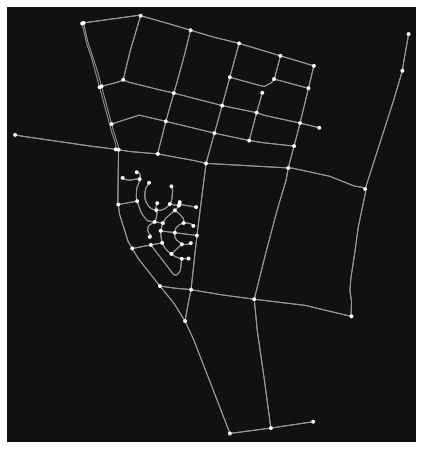

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [16]:
point = (38.441506, 106.265488)
graph = ox.graph_from_point(point, dist=1305, network_type="all")
ox.plot_graph(graph)

In [12]:
for k, v in graph.__dict__.items():
    print(k, v, sep="\n", end="\n\n")

edge_key_dict_factory
<class 'dict'>

graph_attr_dict_factory
<class 'dict'>

node_dict_factory
<class 'dict'>

node_attr_dict_factory
<class 'dict'>

adjlist_outer_dict_factory
<class 'dict'>

adjlist_inner_dict_factory
<class 'dict'>

edge_attr_dict_factory
<class 'dict'>

graph
{'created_date': '2021-05-15 20:37:15', 'created_with': 'OSMnx 1.1.0', 'crs': 'epsg:4326', 'simplified': True}

_node
{845828330: {'y': 38.4448663, 'x': 106.2644908, 'street_count': 4}, 845828387: {'y': 38.4434629, 'x': 106.2755701, 'street_count': 4}, 845828589: {'y': 38.4456105, 'x': 106.2583991, 'street_count': 4}, 1508704516: {'y': 38.4381721, 'x': 106.2612789, 'street_count': 3}, 1508704518: {'y': 38.4379763, 'x': 106.2634446, 'street_count': 4}, 1508704545: {'y': 38.4461114, 'x': 106.2674971, 'street_count': 3}, 1508704554: {'y': 38.4476311, 'x': 106.2680165, 'street_count': 4}, 1508704557: {'y': 38.4480187, 'x': 106.265613, 'street_count': 4}, 1508704584: {'y': 38.4499183, 'x': 106.2781656, 'street_cou

In [20]:
north, south, east, west = ox.utils_geo.bbox_from_point(point, 1305)

## osmnx.io module
Serialize graphs to/from files on disk.

## osmnx.io.load_graphml(filepath, node_dtypes=None, edge_dtypes=None, graph_dtypes=None)
Load an ## osmnx-saved GraphML file from disk.

This converts node, edge, and graph-level attributes (serialized as strings) to their appropriate data types. These can be customized as needed by passing in dtypes arguments providing types or custom converter functions. For example, if you want to convert some attribute’s values to bool, consider using the built-in ox.io._convert_bool_string function to properly handle “True”/”False” string literals as True/False booleans: ox.load_graphml(fp, node_dtypes={my_attr: ox.io._convert_bool_string})

If you manually configured the all_oneway=True setting, you may need to manually specify here that edge oneway attributes should be type str.

Parameters:	
filepath (string or pathlib.Path) – path to the GraphML file
node_dtypes (dict) – dict of node attribute names:types to convert values’ data types. the type can be a python type or a custom string converter function.
edge_dtypes (dict) – dict of edge attribute names:types to convert values’ data types. the type can be a python type or a custom string converter function.
graph_dtypes (dict) – dict of graph-level attribute names:types to convert values’ data types. the type can be a python type or a custom string converter function.
Returns:	
G

Return type:	
networkx.MultiDiGraph

## osmnx.io.save_graph_geopackage(G, filepath=None, encoding='utf-8', directed=False)
Save graph nodes and edges to disk as layers in a GeoPackage file.

Parameters:	
G (networkx.MultiDiGraph) – input graph
filepath (string or pathlib.Path) – path to the GeoPackage file including extension. if None, use default data folder + graph.gpkg
encoding (string) – the character encoding for the saved file
directed (bool) – if False, save one edge for each undirected edge in the graph but retain original oneway and to/from information as edge attributes; if True, save one edge for each directed edge in the graph
Returns:	
Return type:	
None

## osmnx.io.save_graph_shapefile(G, filepath=None, encoding='utf-8', directed=False)
Save graph nodes and edges to disk as ESRI shapefiles.

The shapefile format is proprietary and outdated. Whenever possible, you should use the superior GeoPackage file format instead via the save_graph_geopackage function.

Parameters:	
G (networkx.MultiDiGraph) – input graph
filepath (string or pathlib.Path) – path to the shapefiles folder (no file extension). if None, use default data folder + graph_shapefile
encoding (string) – the character encoding for the saved files
directed (bool) – if False, save one edge for each undirected edge in the graph but retain original oneway and to/from information as edge attributes; if True, save one edge for each directed edge in the graph
Returns:	
Return type:	
None

## osmnx.io.save_graph_xml(data, filepath=None, node_tags=['highway'], node_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon'], edge_tags=['highway', 'lanes', 'maxspeed', 'name', 'oneway'], edge_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset'], oneway=False, merge_edges=True, edge_tag_aggs=None)
Do not use: deprecated. Use osm_xml.save_graph_xml instead.

Parameters:	
data (networkx multi(di)graph OR a length 2 iterable of nodes/edges) – geopandas GeoDataFrames
filepath (string or pathlib.Path) – path to the .osm file including extension. if None, use default data folder + graph.osm
node_tags (list) – osm node tags to include in output OSM XML
node_attrs (list) – osm node attributes to include in output OSM XML
edge_tags (list) – osm way tags to include in output OSM XML
edge_attrs (list) – osm way attributes to include in output OSM XML
oneway (bool) – the default oneway value used to fill this tag where missing
merge_edges (bool) – if True merges graph edges such that each OSM way has one entry and one entry only in the OSM XML. Otherwise, every OSM way will have a separate entry for each node pair it contains.
edge_tag_aggs (list of length-2 string tuples) – useful only if merge_edges is True, this argument allows the user to specify edge attributes to aggregate such that the merged OSM way entry tags accurately represent the sum total of their component edge attributes. For example, if the user wants the OSM way to have a “length” attribute, the user must specify edge_tag_aggs=[(‘length’, ‘sum’)] in order to tell this method to aggregate the lengths of the individual component edges. Otherwise, the length attribute will simply reflect the length of the first edge associated with the way.
Returns:	
Return type:	
None

## osmnx.io.save_graphml(G, filepath=None, gephi=False, encoding='utf-8')
Save graph to disk as GraphML file.

Parameters:	
G (networkx.MultiDiGraph) – input graph
filepath (string or pathlib.Path) – path to the GraphML file including extension. if None, use default data folder + graph.graphml
gephi (bool) – if True, give each edge a unique key/id to work around Gephi’s interpretation of the GraphML specification
encoding (string) – the character encoding for the saved file
Returns:	
Return type:	
None

## osmnx.osm_xml module
Read/write .osm formatted XML files.

## osmnx.osm_xml.save_graph_xml(data, filepath=None, node_tags=['highway'], node_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon'], edge_tags=['highway', 'lanes', 'maxspeed', 'name', 'oneway'], edge_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset'], oneway=False, merge_edges=True, edge_tag_aggs=None)
Save graph to disk as an OSM-formatted XML .osm file.

This function exists only to allow serialization to the .osm file format for applications that require it, and has constraints to conform to that. To save/load full-featured OSMnx graphs to/from disk for later use, use the io.save_graphml and io.load_graphml functions instead. To load a graph from a .osm file, use the graph.graph_from_xml function.

Note: for large networks this function can take a long time to run. Before using this function, make sure you configured OSMnx as described in the example below when you created the graph.

Example
```python
>>> import osmnx as ox
>>> utn = ox.settings.useful_tags_node
>>> oxna = ox.settings.osm_xml_node_attrs
>>> oxnt = ox.settings.osm_xml_node_tags
>>> utw = ox.settings.useful_tags_way
>>> oxwa = ox.settings.osm_xml_way_attrs
>>> oxwt = ox.settings.osm_xml_way_tags
>>> utn = list(set(utn + oxna + oxnt))
>>> utw = list(set(utw + oxwa + oxwt))
>>> ox.config(all_oneway=True, useful_tags_node=utn, useful_tags_way=utw)
>>> G = ox.graph_from_place('Piedmont, CA, USA', network_type='drive')
>>> ox.save_graph_xml(G, filepath='./data/graph.osm')
```

Parameters:	
data (networkx multi(di)graph OR a length 2 iterable of nodes/edges) – geopandas GeoDataFrames
filepath (string or pathlib.Path) – path to the .osm file including extension. if None, use default data folder + graph.osm
node_tags (list) – osm node tags to include in output OSM XML
node_attrs (list) – osm node attributes to include in output OSM XML
edge_tags (list) – osm way tags to include in output OSM XML
edge_attrs (list) – osm way attributes to include in output OSM XML
oneway (bool) – the default oneway value used to fill this tag where missing
merge_edges (bool) – if True merges graph edges such that each OSM way has one entry and one entry only in the OSM XML. Otherwise, every OSM way will have a separate entry for each node pair it contains.
edge_tag_aggs (list of length-2 string tuples) – useful only if merge_edges is True, this argument allows the user to specify edge attributes to aggregate such that the merged OSM way entry tags accurately represent the sum total of their component edge attributes. For example, if the user wants the OSM way to have a “length” attribute, the user must specify edge_tag_aggs=[(‘length’, ‘sum’)] in order to tell this method to aggregate the lengths of the individual component edges. Otherwise, the length attribute will simply reflect the length of the first edge associated with the way.
Returns:	
Return type:	
None

# osmnx.plot module
Plot spatial geometries, street networks, and routes.

## osmnx.plot.get_colors(n, cmap='viridis', start=0.0, stop=1.0, alpha=1.0, return_hex=False)
Get n evenly-spaced colors from a matplotlib colormap.

Parameters:	
n (int) – number of colors
cmap (string) – name of a matplotlib colormap
start (float) – where to start in the colorspace
stop (float) – where to end in the colorspace
alpha (float) – opacity, the alpha channel for the RGBa colors
return_hex (bool) – if True, convert RGBa colors to HTML-like hexadecimal RGB strings. if False, return colors as (R, G, B, alpha) tuples.
Returns:	
color_list

Return type:	
list

## osmnx.plot.get_edge_colors_by_attr(G, attr, num_bins=None, cmap='viridis', start=0, stop=1, na_color='none', equal_size=False)
Get colors based on edge attribute values.

Parameters:	
G (networkx.MultiDiGraph) – input graph
attr (string) – name of a numerical edge attribute
num_bins (int) – if None, linearly map a color to each value. otherwise, assign values to this many bins then assign a color to each bin.
cmap (string) – name of a matplotlib colormap
start (float) – where to start in the colorspace
stop (float) – where to end in the colorspace
na_color (string) – what color to assign edges with missing attr values
equal_size (bool) – ignored if num_bins is None. if True, bin into equal-sized quantiles (requires unique bin edges). if False, bin into equal-spaced bins.
Returns:	
edge_colors – series labels are edge IDs (u, v, key) and values are colors

Return type:	
pandas.Series

## osmnx.plot.get_node_colors_by_attr(G, attr, num_bins=None, cmap='viridis', start=0, stop=1, na_color='none', equal_size=False)
Get colors based on node attribute values.

Parameters:	
G (networkx.MultiDiGraph) – input graph
attr (string) – name of a numerical node attribute
num_bins (int) – if None, linearly map a color to each value. otherwise, assign values to this many bins then assign a color to each bin.
cmap (string) – name of a matplotlib colormap
start (float) – where to start in the colorspace
stop (float) – where to end in the colorspace
na_color (string) – what color to assign nodes with missing attr values
equal_size (bool) – ignored if num_bins is None. if True, bin into equal-sized quantiles (requires unique bin edges). if False, bin into equal-spaced bins.
Returns:	
node_colors – series labels are node IDs and values are colors

Return type:	
pandas.Series

## osmnx.plot.plot_figure_ground(G=None, address=None, point=None, dist=805, network_type='drive_service', street_widths=None, default_width=4, figsize=(8, 8), edge_color='w', smooth_joints=True, **pg_kwargs)
Plot a figure-ground diagram of a street network.

Parameters:	
G (networkx.MultiDiGraph) – input graph, must be unprojected
address (string) – address to geocode as the center point if G is not passed in
point (tuple) – center point if address and G are not passed in
dist (numeric) – how many meters to extend north, south, east, west from center point
network_type (string) – what type of street network to get
street_widths (dict) – dict keys are street types and values are widths to plot in pixels
default_width (numeric) – fallback width in pixels for any street type not in street_widths
figsize (numeric) – (width, height) of figure, should be equal
edge_color (string) – color of the edges’ lines
smooth_joints (bool) – if True, plot nodes same width as streets to smooth line joints and prevent cracks between them from showing
pg_kwargs – keyword arguments to pass to plot_graph
Returns:	
fig, ax – matplotlib figure, axis

Return type:	
tuple

## osmnx.plot.plot_footprints(gdf, ax=None, figsize=(8, 8), color='orange', alpha=None, bgcolor='#111111', bbox=None, save=False, show=True, close=False, filepath=None, dpi=600)
Plot a GeoDataFrame of geospatial entities’ footprints.

Parameters:	
gdf (geopandas.GeoDataFrame) – GeoDataFrame of footprints (shapely Polygons and MultiPolygons)
ax (axis) – if not None, plot on this preexisting axis
figsize (tuple) – if ax is None, create new figure with size (width, height)
color (string) – color of the footprints
alpha (float) – opacity of the footprints
bgcolor (string) – background color of the plot
bbox (tuple) – bounding box as (north, south, east, west). if None, will calculate from the spatial extents of the geometries in gdf
save (bool) – if True, save the figure to disk at filepath
show (bool) – if True, call pyplot.show() to show the figure
close (bool) – if True, call pyplot.close() to close the figure
filepath (string) – if save is True, the path to the file. file format determined from extension. if None, use settings.imgs_folder/image.png
dpi (int) – if save is True, the resolution of saved file
Returns:	
fig, ax – matplotlib figure, axis

Return type:	
tuple

## osmnx.plot.plot_graph(G, ax=None, figsize=(8, 8), bgcolor='#111111', node_color='w', node_size=15, node_alpha=None, node_edgecolor='none', node_zorder=1, edge_color='#999999', edge_linewidth=1, edge_alpha=None, show=True, close=False, save=False, filepath=None, dpi=300, bbox=None)
Plot a graph.

Parameters:	
G (networkx.MultiDiGraph) – input graph
ax (matplotlib axis) – if not None, plot on this preexisting axis
figsize (tuple) – if ax is None, create new figure with size (width, height)
bgcolor (string) – background color of plot
node_color (string or list) – color(s) of the nodes
node_size (int) – size of the nodes: if 0, then skip plotting the nodes
node_alpha (float) – opacity of the nodes, note: if you passed RGBA values to node_color, set node_alpha=None to use the alpha channel in node_color
node_edgecolor (string) – color of the nodes’ markers’ borders
node_zorder (int) – zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
edge_color (string or list) – color(s) of the edges’ lines
edge_linewidth (float) – width of the edges’ lines: if 0, then skip plotting the edges
edge_alpha (float) – opacity of the edges, note: if you passed RGBA values to edge_color, set edge_alpha=None to use the alpha channel in edge_color
show (bool) – if True, call pyplot.show() to show the figure
close (bool) – if True, call pyplot.close() to close the figure
save (bool) – if True, save the figure to disk at filepath
filepath (string) – if save is True, the path to the file. file format determined from extension. if None, use settings.imgs_folder/image.png
dpi (int) – if save is True, the resolution of saved file
bbox (tuple) – bounding box as (north, south, east, west). if None, will calculate from spatial extents of plotted geometries.
Returns:	
fig, ax – matplotlib figure, axis

Return type:	
tuple

## osmnx.plot.plot_graph_route(G, route, route_color='r', route_linewidth=4, route_alpha=0.5, orig_dest_size=100, ax=None, **pg_kwargs)
Plot a route along a graph.

Parameters:	
G (networkx.MultiDiGraph) – input graph
route (list) – route as a list of node IDs
route_color (string) – color of the route
route_linewidth (int) – width of the route line
route_alpha (float) – opacity of the route line
orig_dest_size (int) – size of the origin and destination nodes
ax (matplotlib axis) – if not None, plot route on this preexisting axis instead of creating a new fig, ax and drawing the underlying graph
pg_kwargs – keyword arguments to pass to plot_graph
Returns:	
fig, ax – matplotlib figure, axis

Return type:	
tuple

## osmnx.plot.plot_graph_routes(G, routes, route_colors='r', route_linewidths=4, **pgr_kwargs)
Plot several routes along a graph.

Parameters:	
G (networkx.MultiDiGraph) – input graph
routes (list) – routes as a list of lists of node IDs
route_colors (string or list) – if string, 1 color for all routes. if list, the colors for each route.
route_linewidths (int or list) – if int, 1 linewidth for all routes. if list, the linewidth for each route.
pgr_kwargs – keyword arguments to pass to plot_graph_route
Returns:	
fig, ax – matplotlib figure, axis

Return type:	
tuple

## osmnx.projection module
Project spatial geometries and spatial networks.

## osmnx.projection.is_projected(crs)
Determine if a coordinate reference system is projected or not.

This is a convenience wrapper around the pyproj.CRS.is_projected function.

Parameters:	crs (string or pyproj.CRS) – the coordinate reference system
Returns:	projected – True if crs is projected, otherwise False
Return type:	bool
## osmnx.projection.project_gdf(gdf, to_crs=None, to_latlong=False)
Project a GeoDataFrame from its current CRS to another.

If to_crs is None, project to the UTM CRS for the UTM zone in which the GeoDataFrame’s centroid lies. Otherwise project to the CRS defined by to_crs. The simple UTM zone calculation in this function works well for most latitudes, but may not work for some extreme northern locations like Svalbard or far northern Norway.

Parameters:	
gdf (geopandas.GeoDataFrame) – the GeoDataFrame to be projected
to_crs (string or pyproj.CRS) – if None, project to UTM zone in which gdf’s centroid lies, otherwise project to this CRS
to_latlong (bool) – if True, project to settings.default_crs and ignore to_crs
Returns:	
gdf_proj – the projected GeoDataFrame

Return type:	
geopandas.GeoDataFrame

## osmnx.projection.project_geometry(geometry, crs=None, to_crs=None, to_latlong=False)
Project a shapely geometry from its current CRS to another.

If to_crs is None, project to the UTM CRS for the UTM zone in which the geometry’s centroid lies. Otherwise project to the CRS defined by to_crs.

Parameters:	
geometry (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – the geometry to project
crs (string or pyproj.CRS) – the starting CRS of the passed-in geometry. if None, it will be set to settings.default_crs
to_crs (string or pyproj.CRS) – if None, project to UTM zone in which geometry’s centroid lies, otherwise project to this CRS
to_latlong (bool) – if True, project to settings.default_crs and ignore to_crs
Returns:	
geometry_proj, crs – the projected geometry and its new CRS

Return type:	
tuple

## osmnx.projection.project_graph(G, to_crs=None)
Project graph from its current CRS to another.

If to_crs is None, project the graph to the UTM CRS for the UTM zone in which the graph’s centroid lies. Otherwise, project the graph to the CRS defined by to_crs.

Parameters:	
G (networkx.MultiDiGraph) – the graph to be projected
to_crs (string or pyproj.CRS) – if None, project graph to UTM zone in which graph centroid lies, otherwise project graph to this CRS
Returns:	
G_proj – the projected graph

Return type:	
networkx.MultiDiGraph

osmnx.settings module
Global settings that can be configured by user with utils.config().

## osmnx.simplification module
Simplify, correct, and consolidate network topology.

## osmnx.simplification.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=False, reconnect_edges=True)
Consolidate intersections comprising clusters of nearby nodes.

Merges nearby nodes and returns either their centroids or a rebuilt graph with consolidated intersections and reconnected edge geometries. The tolerance argument should be adjusted to approximately match street design standards in the specific street network, and you should always use a projected graph to work in meaningful and consistent units like meters.

When rebuild_graph=False, it uses a purely geometrical (and relatively fast) algorithm to identify “geometrically close” nodes, merge them, and return just the merged intersections’ centroids. When rebuild_graph=True, it uses a topological (and slower but more accurate) algorithm to identify “topologically close” nodes, merge them, then rebuild/return the graph. Returned graph’s node IDs represent clusters rather than osmids. Refer to nodes’ osmid_original attributes for original osmids. If multiple nodes were merged together, the osmid_original attribute is a list of merged nodes’ osmids.

Divided roads are often represented by separate centerline edges. The intersection of two divided roads thus creates 4 nodes, representing where each edge intersects a perpendicular edge. These 4 nodes represent a single intersection in the real world. A similar situation occurs with roundabouts and traffic circles. This function consolidates nearby nodes by buffering them to an arbitrary distance, merging overlapping buffers, and taking their centroid.

Parameters:	
G (networkx.MultiDiGraph) – a projected graph
tolerance (float) – nodes are buffered to this distance (in graph’s geometry’s units) and subsequent overlaps are dissolved into a single node
rebuild_graph (bool) – if True, consolidate the nodes topologically, rebuild the graph, and return as networkx.MultiDiGraph. if False, consolidate the nodes geometrically and return the consolidated node points as geopandas.GeoSeries
dead_ends (bool) – if False, discard dead-end nodes to return only street-intersection points
reconnect_edges (bool) – ignored if rebuild_graph is not True. if True, reconnect edges and their geometries in rebuilt graph to the consolidated nodes and update edge length attributes; if False, returned graph has no edges (which is faster if you just need topologically consolidated intersection counts).
Returns:	
if rebuild_graph=True, returns MultiDiGraph with consolidated intersections and reconnected edge geometries. if rebuild_graph=False, returns GeoSeries of shapely Points representing the centroids of street intersections

Return type:	
networkx.MultiDiGraph or geopandas.GeoSeries

## osmnx.simplification.simplify_graph(G, strict=True, remove_rings=True)
Simplify a graph’s topology by removing interstitial nodes.

Simplifies graph topology by removing all nodes that are not intersections or dead-ends. Create an edge directly between the end points that encapsulate them, but retain the geometry of the original edges, saved as a new geometry attribute on the new edge. Note that only simplified edges receive a geometry attribute. Some of the resulting consolidated edges may comprise multiple OSM ways, and if so, their multiple attribute values are stored as a list.

Parameters:	
G (networkx.MultiDiGraph) – input graph
strict (bool) – if False, allow nodes to be end points even if they fail all other rules but have incident edges with different OSM IDs. Lets you keep nodes at elbow two-way intersections, but sometimes individual blocks have multiple OSM IDs within them too.
remove_rings (bool) – if True, remove isolated self-contained rings that have no endpoints
Returns:	
G – topologically simplified graph, with a new geometry attribute on each simplified edge

Return type:	
networkx.MultiDiGraph

osmnx.speed module
Calculate graph edge speeds and travel times.

osmnx.speed.add_edge_speeds(G, hwy_speeds=None, fallback=None, precision=1)
Add edge speeds (km per hour) to graph as new speed_kph edge attributes.

Imputes free-flow travel speeds for all edges based on mean maxspeed value of edges, per highway type. For highway types in graph that have no maxspeed value on any edge, function assigns the mean of all maxspeed values in graph.

This mean-imputation can obviously be imprecise, and the caller can override it by passing in hwy_speeds and/or fallback arguments that correspond to local speed limit standards.

If edge maxspeed attribute has “mph” in it, value will automatically be converted from miles per hour to km per hour. Any other speed units should be manually converted to km per hour prior to running this function, otherwise there could be unexpected results. If “mph” does not appear in the edge’s maxspeed attribute string, then function assumes kph, per OSM guidelines: https://wiki.openstreetmap.org/wiki/Map_Features/Units

Parameters:	
G (networkx.MultiDiGraph) – input graph
hwy_speeds (dict) – dict keys = OSM highway types and values = typical speeds (km per hour) to assign to edges of that highway type for any edges missing speed data. Any edges with highway type not in hwy_speeds will be assigned the mean preexisting speed value of all edges of that highway type.
fallback (numeric) – default speed value (km per hour) to assign to edges whose highway type did not appear in hwy_speeds and had no preexisting speed values on any edge
precision (int) – decimal precision to round speed_kph
Returns:	
G – graph with speed_kph attributes on all edges

Return type:	
networkx.MultiDiGraph

osmnx.speed.add_edge_travel_times(G, precision=1)
Add edge travel time (seconds) to graph as new travel_time edge attributes.

Calculates free-flow travel time along each edge, based on length and speed_kph attributes. Note: run add_edge_speeds first to generate the speed_kph attribute. All edges must have length and speed_kph attributes and all their values must be non-null.

Parameters:	
G (networkx.MultiDiGraph) – input graph
precision (int) – decimal precision to round travel_time
Returns:	
G – graph with travel_time attributes on all edges

Return type:	
networkx.MultiDiGraph

# osmnx.stats module
Calculate geometric and topological network measures.

This module defines streets as the edges in an undirected representation of the graph. Using undirected graph edges prevents double-counting bidirectional edges of a two-way street, but may double-count a divided road’s separate centerlines with different end point nodes. If clean_periphery=True when the graph was created (which is the default parameterization), then you will get accurate node degrees (and in turn streets-per-node counts) even at the periphery of the graph.

You can use NetworkX directly for additional topological network measures.

## osmnx.stats.basic_stats(G, area=None, clean_int_tol=None, clean_intersects=None, tolerance=None, circuity_dist=None)
Calculate basic descriptive geometric and topological measures of a graph.

Density measures are only calculated if area is provided and clean intersection measures are only calculated if clean_int_tol is provided.

Parameters:	
G (networkx.MultiDiGraph) – input graph
area (float) – if not None, calculate density measures and use this area value (in square meters) as the denominator
clean_int_tol (float) – if not None, calculate consolidated intersections count (and density, if area is also provided) and use this tolerance value; refer to the simplification.consolidate_intersections function documentation for details
clean_intersects (bool) – deprecated, do not use
tolerance (float) – deprecated, do not use
circuity_dist (string) – deprecated, do not use
Returns:	
stats –

dictionary containing the following attributes
circuity_avg - see circuity_avg function documentation
clean_intersection_count - see clean_intersection_count function documentation
clean_intersection_density_km - clean_intersection_count per sq km
edge_density_km - edge_length_total per sq km
edge_length_avg - edge_length_total / m
edge_length_total - see edge_length_total function documentation
intersection_count - see intersection_count function documentation
intersection_density_km - intersection_count per sq km
k_avg - graph’s average node degree (in-degree and out-degree)
m - count of edges in graph
n - count of nodes in graph
node_density_km - n per sq km
self_loop_proportion - see self_loop_proportion function documentation
street_density_km - street_length_total per sq km
street_length_avg - street_length_total / street_segment_count
street_length_total - see street_length_total function documentation
street_segment_count - see street_segment_count function documentation
streets_per_node_avg - see streets_per_node_avg function documentation
streets_per_node_counts - see streets_per_node_counts function documentation
streets_per_node_proportions - see streets_per_node_proportions function documentation


## osmnx.stats.circuity_avg(Gu)
Calculate average street circuity using edges of undirected graph.

Circuity is the sum of edge lengths divided by the sum of straight-line distances between edge endpoints. Calculates straight-line distance as euclidean distance if projected or great-circle distance if unprojected.

Parameters:	Gu (networkx.MultiGraph) – undirected input graph
Returns:	circuity_avg – the graph’s average undirected edge circuity
Return type:	float
## osmnx.stats.edge_length_total(G)
Calculate graph’s total edge length.

Parameters:	G (networkx.MultiDiGraph) – input graph
Returns:	length – total length (meters) of edges in graph
Return type:	float
## osmnx.stats.extended_stats(G, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
Do not use: deprecated and will be removed in a future release.

Parameters:	
G (networkx.MultiDiGraph) – deprecated
connectivity (bool) – deprecated
anc (bool) – deprecated
ecc (bool) – deprecated
bc (bool) – deprecated
cc (bool) – deprecated
Returns:	
Return type:	
dict

## osmnx.stats.intersection_count(G=None, min_streets=2)
Count the intersections in a graph.

Intersections are defined as nodes with at least min_streets number of streets incident on them.

Parameters:	
G (networkx.MultiDiGraph) – input graph
min_streets (int) – a node must have at least min_streets incident on them to count as an intersection
Returns:	
count – count of intersections in graph

Return type:	
int

## osmnx.stats.self_loop_proportion(Gu)
Calculate percent of edges that are self-loops in a graph.

A self-loop is defined as an edge from node u to node v where u==v.

Parameters:	Gu (networkx.MultiGraph) – undirected input graph
Returns:	proportion – proportion of graph edges that are self-loops
Return type:	float
## osmnx.stats.street_length_total(Gu)
Calculate graph’s total street segment length.

Parameters:	Gu (networkx.MultiGraph) – undirected input graph
Returns:	length – total length (meters) of streets in graph
Return type:	float
## osmnx.stats.street_segment_count(Gu)
Count the street segments in a graph.

Parameters:	Gu (networkx.MultiGraph) – undirected input graph
Returns:	count – count of street segments in graph
Return type:	int
## osmnx.stats.streets_per_node(G)
Count streets (undirected edges) incident on each node.

Parameters:	G (networkx.MultiDiGraph) – input graph
Returns:	spn – dictionary with node ID keys and street count values
Return type:	dict
## osmnx.stats.streets_per_node_avg(G)
Calculate graph’s average count of streets per node.

Parameters:	G (networkx.MultiDiGraph) – input graph
Returns:	spna – average count of streets per node
Return type:	float
## osmnx.stats.streets_per_node_counts(G)
Calculate streets-per-node counts.

Parameters:	G (networkx.MultiDiGraph) – input graph
Returns:	spnc – dictionary keyed by count of streets incident on each node, and with values of how many nodes in the graph have this count
Return type:	dict
## osmnx.stats.streets_per_node_proportions(G)
Calculate streets-per-node proportions.

Parameters:	G (networkx.MultiDiGraph) – input graph
Returns:	spnp – dictionary keyed by count of streets incident on each node, and with values of what proportion of nodes in the graph have this count
Return type:	dict

## osmnx.truncate module
Truncate graph by distance, bounding box, or polygon.

## osmnx.truncate.truncate_graph_bbox(G, north, south, east, west, truncate_by_edge=False, retain_all=False, quadrat_width=0.05, min_num=3)
Remove every node in graph that falls outside a bounding box.

Parameters:	
G (networkx.MultiDiGraph) – input graph
north (float) – northern latitude of bounding box
south (float) – southern latitude of bounding box
east (float) – eastern longitude of bounding box
west (float) – western longitude of bounding box
truncate_by_edge (bool) – if True, retain nodes outside bounding box if at least one of node’s neighbors is within the bounding box
retain_all (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
quadrat_width (numeric) – passed on to intersect_index_quadrats: the linear length (in degrees) of the quadrats with which to cut up the geometry (default = 0.05, approx 4km at NYC’s latitude)
min_num (int) – passed on to intersect_index_quadrats: the minimum number of linear quadrat lines (e.g., min_num=3 would produce a quadrat grid of 4 squares)
Returns:	
G – the truncated graph

Return type:	
networkx.MultiDiGraph

## osmnx.truncate.truncate_graph_dist(G, source_node, max_dist=1000, weight='length', retain_all=False)
Remove every node farther than some network distance from source_node.

This function can be slow for large graphs, as it must calculate shortest path distances between source_node and every other graph node.

Parameters:	
G (networkx.MultiDiGraph) – input graph
source_node (int) – the node in the graph from which to measure network distances to other nodes
max_dist (int) – remove every node in the graph greater than this distance from the source_node (along the network)
weight (string) – how to weight the graph when measuring distance (default ‘length’ is how many meters long the edge is)
retain_all (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
Returns:	
G – the truncated graph

Return type:	
networkx.MultiDiGraph

## osmnx.truncate.truncate_graph_polygon(G, polygon, retain_all=False, truncate_by_edge=False, quadrat_width=0.05, min_num=3)
Remove every node in graph that falls outside a (Multi)Polygon.

Parameters:	
G (networkx.MultiDiGraph) – input graph
polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – only retain nodes in graph that lie within this geometry
retain_all (bool) – if True, return the entire graph even if it is not connected. otherwise, retain only the largest weakly connected component.
truncate_by_edge (bool) – if True, retain nodes outside boundary polygon if at least one of node’s neighbors is within the polygon
quadrat_width (numeric) – passed on to intersect_index_quadrats: the linear length (in degrees) of the quadrats with which to cut up the geometry (default = 0.05, approx 4km at NYC’s latitude)
min_num (int) – passed on to intersect_index_quadrats: the minimum number of linear quadrat lines (e.g., min_num=3 would produce a quadrat grid of 4 squares)
Returns:	
G – the truncated graph

Return type:	
networkx.MultiDiGraph

## osmnx.utils module
General utility functions.

## osmnx.utils.citation()
Print the OSMnx package’s citation information.

Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems, 65(126-139). https://doi.org/10.1016/j.compenvurbsys.2017.05.004

Returns:	
Return type:	None
## osmnx.utils.config
```python
osmnx.utils.config(
    all_oneway=False,
    bidirectional_network_types=['walk'], cache_folder='./cache', cache_only_mode=False, data_folder='./data', default_accept_language='en', default_access='["access"!~"private"]', default_crs='epsg:4326',
    default_referer='OSMnx Python package (https://github.com/gboeing/osmnx)',
    default_user_agent='OSMnx Python package (https://github.com/gboeing/osmnx)',
    elevation_provider='google',
    imgs_folder='./images',
    log_console=False,
    log_file=False,
    log_filename='osmnx', log_level=20, log_name='OSMnx', logs_folder='./logs', max_query_area_size=2500000000, memory=None, 
    nominatim_endpoint='https://nominatim.openstreetmap.org/', 
    nominatim_key=None,
    osm_xml_node_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon'],
    osm_xml_node_tags=['highway'],
    osm_xml_way_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset'],
    osm_xml_way_tags=['highway', 'lanes', 'maxspeed', 'name', 'oneway'],
    overpass_endpoint='http://overpass-api.de/api',
    overpass_settings='[out:json][timeout:{timeout}]{maxsize}',
    timeout=180,
    use_cache=True,
    useful_tags_node=['ref', 'highway'],
    useful_tags_way=['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']
)
```
Configure OSMnx by setting the default global settings’ values.

Any parameters not passed by the caller are (re-)set to their original default values.

Parameters:	
all_oneway (bool) – Only use if specifically saving to .osm XML file with save_graph_xml function. if True, forces all ways to be loaded as oneway ways, preserving the original order of nodes stored in the OSM way XML. This also retains original OSM string values for oneway attribute values, rather than converting them to a True/False bool.
bidirectional_network_types (list) – network types for which a fully bidirectional graph will be created
cache_folder (string or pathlib.Path) – path to folder in which to save/load HTTP response cache
data_folder (string or pathlib.Path) – path to folder in which to save/load graph files by default
cache_only_mode (bool) – If True, download network data from Overpass then raise a CacheOnlyModeInterrupt error for user to catch. This prevents graph building from taking place and instead just saves OSM response data to cache. Useful for sequentially caching lots of raw data (as you can only query Overpass one request at a time) then using the cache to quickly build many graphs simultaneously with multiprocessing.
default_accept_language (string) – HTTP header accept-language
default_access (string) – default filter for OSM “access” key
default_crs (string) – default coordinate reference system to set when creating graphs
default_referer (string) – HTTP header referer
default_user_agent (string) – HTTP header user-agent
elevation_provider (string {"google", "airmap"}) – the API provider to use for adding node elevations
imgs_folder (string or pathlib.Path) – path to folder in which to save plot images by default
log_file (bool) – if True, save log output to a file in logs_folder
log_filename (string) – name of the log file, without file extension
log_console (bool) – if True, print log output to the console (terminal window)
log_level (int) – one of Python’s logger.level constants
log_name (string) – name of the logger
logs_folder (string or pathlib.Path) – path to folder in which to save log files
max_query_area_size (int) – maximum area for any part of the geometry in meters: any polygon bigger than this will get divided up for multiple queries to API (default 50km x 50km)
memory (int) – Overpass server memory allocation size for the query, in bytes. If None, server will use its default allocation size. Use with caution.
nominatim_endpoint (string) – the API endpoint to use for nominatim queries
nominatim_key (string) – your API key, if you are using an endpoint that requires one
osm_xml_node_attrs (list) – node attributes for saving .osm XML files with save_graph_xml function
osm_xml_node_tags (list) – node tags for saving .osm XML files with save_graph_xml function
osm_xml_way_attrs (list) – edge attributes for saving .osm XML files with save_graph_xml function
osm_xml_way_tags (list) – edge tags for for saving .osm XML files with save_graph_xml function
overpass_endpoint (string) – the API endpoint to use for overpass queries
overpass_settings (string) – Settings string for overpass queries. For example, to query historical OSM data as of a certain date: '[out:json][timeout:90][date:"2019-10-28T19:20:00Z"]'. Use with caution.
timeout (int) – the timeout interval for the HTTP request and for API to use while running the query
use_cache (bool) – if True, cache HTTP responses locally instead of calling API repeatedly for the same request
useful_tags_node (list) – OSM “node” tags to add as graph node attributes, when present
useful_tags_way (list) – OSM “way” tags to add as graph edge attributes, when present
Returns:	
Return type:	
None

## osmnx.utils.log(message, level=None, name=None, filename=None)
Write a message to the logger.

This logs to file and/or prints to the console (terminal), depending on the current configuration of settings.log_file and settings.log_console.

Parameters:	
message (string) – the message to log
level (int) – one of Python’s logger.level constants
name (string) – name of the logger
filename (string) – name of the log file, without file extension
Returns:	
Return type:	
None

## osmnx.utils.ts(style='datetime', template=None)
Get current timestamp as string.

Parameters:	
style (string {"datetime", "date", "time"}) – format the timestamp with this built-in template
template (string) – if not None, format the timestamp with this template instead of one of the built-in styles
Returns:	
ts – the string timestamp

Return type:	
string

## osmnx.utils_geo module
Geospatial utility functions.

## osmnx.utils_geo.bbox_from_point(point, dist=1000, project_utm=False, return_crs=False)
Create a bounding box from a (lat, lng) center point.

Create a bounding box some distance in each direction (north, south, east, and west) from the center point and optionally project it.

Parameters:	
point (tuple) – the (lat, lng) center point to create the bounding box around
dist (int) – bounding box distance in meters from the center point
project_utm (bool) – if True, return bounding box as UTM-projected coordinates
return_crs (bool) – if True, and project_utm=True, return the projected CRS too
Returns:	
(north, south, east, west) or (north, south, east, west, crs_proj)

Return type:	
tuple

## osmnx.utils_geo.bbox_to_poly(north, south, east, west)
Convert bounding box coordinates to shapely Polygon.

Parameters:	
north (float) – northern coordinate
south (float) – southern coordinate
east (float) – eastern coordinate
west (float) – western coordinate
Returns:	
Return type:	
shapely.geometry.Polygon

## osmnx.utils_geo.interpolate_points(geom, dist)
Interpolate evenly spaced points along a LineString.

The spacing is approximate because the LineString’s length may not be evenly divisible by it.

Parameters:	
geom (shapely.geometry.LineString) – a LineString geometry
dist (float) – spacing distance between interpolated points, in same units as geom. smaller values generate more points.
Yields:	
points (generator) – a generator of (x, y) tuples of the interpolated points’ coordinates

## osmnx.utils_geo.redistribute_vertices(geom, dist)
Do not use, deprecated.

Parameters:	
geom (shapely.geometry.LineString or shapely.geometry.MultiLineString) – deprecated, do not use
dist (float) – deprecated, do not use
Returns:	
Return type:	
list or shapely.geometry.MultiLineString

## osmnx.utils_geo.round_geometry_coords(geom, precision)
Round the coordinates of a shapely geometry to some decimal precision.

Parameters:	
geom (shapely.geometry.geometry {Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon}) – the geometry to round the coordinates of
precision (int) – decimal precision to round coordinates to
Returns:	
Return type:	
shapely.geometry.geometry

## osmnx.utils_geo.sample_points(G, n)
Randomly sample points constrained to a spatial graph.

This generates a graph-constrained uniform random sample of points. Unlike typical spatially uniform random sampling, this method accounts for the graph’s geometry. And unlike equal-length edge segmenting, this method guarantees uniform randomness.

Parameters:	
G (networkx.MultiGraph) – graph to sample points from; should be undirected (to not oversample bidirectional edges) and projected (for accurate point interpolation)
n (int) – how many points to sample
Returns:	
points – the sampled points, multi-indexed by (u, v, key) of the edge from which each point was drawn

Return type:	
geopandas.GeoSeries

## osmnx.utils_graph module
Graph utility functions.

## osmnx.utils_graph.count_streets_per_node(G, nodes=None)
Count how many physical street segments connect to each node in a graph.

This function uses an undirected representation of the graph and special handling of self-loops to accurately count physical streets rather than directed edges. Note: this function is automatically run by all the graph.graph_from_x functions prior to truncating the graph to the requested boundaries, to add accurate street_count attributes to each node even if some of its neighbors are outside the requested graph boundaries.

Parameters:	
G (networkx.MultiDiGraph) – input graph
nodes (list) – which node IDs to get counts for. if None, use all graph nodes, otherwise calculate counts only for these node IDs
Returns:	
streets_per_node – counts of how many physical streets connect to each node, with keys = node ids and values = counts

Return type:	
dict

## osmnx.utils_graph.get_digraph(G, weight='length')
Convert MultiDiGraph to DiGraph.

Chooses between parallel edges by minimizing weight attribute value. Note: see also get_undirected to convert MultiDiGraph to MultiGraph.

Parameters:	
G (networkx.MultiDiGraph) – input graph
weight (string) – attribute value to minimize when choosing between parallel edges
Returns:	
Return type:	
networkx.DiGraph

## osmnx.utils_graph.get_largest_component(G, strongly=False)
Get subgraph of G’s largest weakly/strongly connected component.

Parameters:	
G (networkx.MultiDiGraph) – input graph
strongly (bool) – if True, return the largest strongly instead of weakly connected component
Returns:	
G – the largest connected component subgraph of the original graph

Return type:	
networkx.MultiDiGraph

## osmnx.utils_graph.get_route_edge_attributes(G, route, attribute=None, minimize_key='length', retrieve_default=None)
Get a list of attribute values for each edge in a path.

Parameters:	
G (networkx.MultiDiGraph) – input graph
route (list) – list of nodes IDs constituting the path
attribute (string) – the name of the attribute to get the value of for each edge. If None, the complete data dict is returned for each edge.
minimize_key (string) – if there are parallel edges between two nodes, select the one with the lowest value of minimize_key
retrieve_default (Callable[Tuple[Any, Any], Any]) – function called with the edge nodes as parameters to retrieve a default value, if the edge does not contain the given attribute (otherwise a KeyError is raised)
Returns:	
attribute_values – list of edge attribute values

Return type:	
list

## osmnx.utils_graph.get_undirected(G)
Convert MultiDiGraph to undirected MultiGraph.

Maintains parallel edges only if their geometries differ. Note: see also get_digraph to convert MultiDiGraph to DiGraph.

Parameters:	G (networkx.MultiDiGraph) – input graph
Returns:	
Return type:	networkx.MultiGraph
## osmnx.utils_graph.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=None)
Convert node and edge GeoDataFrames to a MultiDiGraph.

This function is the inverse of graph_to_gdfs and is designed to work in conjunction with it.

However, you can convert arbitrary node and edge GeoDataFrames as long as 1) gdf_nodes is uniquely indexed by osmid, 2) gdf_nodes contains x and y coordinate columns representing node geometries, 3) gdf_edges is uniquely multi-indexed by u, v, key (following normal MultiDiGraph structure). This allows you to load any node/edge shapefiles or GeoPackage layers as GeoDataFrames then convert them to a MultiDiGraph for graph analysis. Note that any geometry attribute on gdf_nodes is discarded since x and y provide the necessary node geometry information instead.

Parameters:	
gdf_nodes (geopandas.GeoDataFrame) – GeoDataFrame of graph nodes uniquely indexed by osmid
gdf_edges (geopandas.GeoDataFrame) – GeoDataFrame of graph edges uniquely multi-indexed by u, v, key
graph_attrs (dict) – the new G.graph attribute dict. if None, use crs from gdf_edges as the only graph-level attribute (gdf_edges must have crs attribute set)
Returns:	
G

Return type:	
networkx.MultiDiGraph

## osmnx.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
Convert a MultiDiGraph to node and/or edge GeoDataFrames.

This function is the inverse of graph_from_gdfs.

Parameters:	
G (networkx.MultiDiGraph) – input graph
nodes (bool) – if True, convert graph nodes to a GeoDataFrame and return it
edges (bool) – if True, convert graph edges to a GeoDataFrame and return it
node_geometry (bool) – if True, create a geometry column from node x and y attributes
fill_edge_geometry (bool) – if True, fill in missing edge geometry fields using nodes u and v
Returns:	
gdf_nodes or gdf_edges or tuple of (gdf_nodes, gdf_edges). gdf_nodes is indexed by osmid and gdf_edges is multi-indexed by u, v, key following normal MultiDiGraph structure.

Return type:	
geopandas.GeoDataFrame or tuple

## osmnx.utils_graph.remove_isolated_nodes(G)
Remove from a graph all nodes that have no incident edges.

Parameters:	G (networkx.MultiDiGraph) – graph from which to remove isolated nodes
Returns:	G – graph with all isolated nodes removed
Return type:	networkx.MultiDiGraph
© Copyright 2016–2021, Geoff Boeing Revision 981ff187.

Built with Sphinx using a theme provided by Read the Docs.
 Read the Docsv: stable 